# Neuron Ensembles

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

In [2]:
tau_rc = 0.02
tau_ref = 0.002

sigma = 0.1

lif_model = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)
model = nengo.Network()

with model: 
    neurons = nengo.Ensemble(100, dimensions=1, 
                            intercepts=nengo.dists.Uniform(-1, 1), 
                            max_rates=nengo.dists.Uniform(100, 200), 
                            neuron_type = lif_model)
    connection = nengo.Connection(neurons, neurons)
    
sim = nengo.Simulator(model)

with sim: 
    x_eval, A = tuning_curves(neurons, sim)
    eval_points_2, x, x_hat = nengo.utils.connection.eval_point_decoding(connection, sim, eval_points=None)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

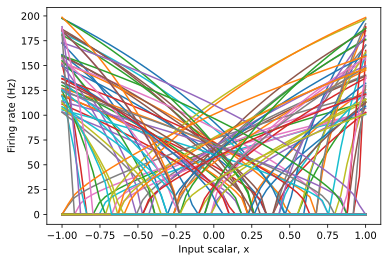

In [3]:
plt.figure()
plt.plot(x_eval, A)
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x"); 

In [4]:
# Compute the RMSE
def computeRMSE(x, x_hat): 
    return np.sqrt(np.mean(np.square(x - x_hat)))

RMSE =  0.004718404870824435


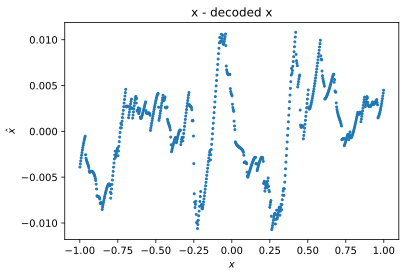

In [5]:
plt.figure()
plt.scatter(x.T[0], x.T[0]-x_hat.T[0], s=4)
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')
plt.title('x - decoded x');

RMSE = computeRMSE(x, x_hat)
print("RMSE = ", RMSE)

**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

In [6]:
radii = [0.5, 1, 2, 4]

RMS = [0]*4

for i,r in enumerate(radii):
    with model:
        neurons = nengo.Ensemble(100, dimensions=1, 
                                intercepts=nengo.dists.Uniform(-1, 1), 
                                max_rates=nengo.dists.Uniform(100, 200), 
                                neuron_type = lif_model, 
                                radius = r, 
                                seed = i)
        connection = nengo.Connection(neurons, neurons)
    
    sim = nengo.Simulator(model)
    eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(connection, sim, eval_points=None)

    RMS[i] = computeRMSE(x, x_hat) 

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

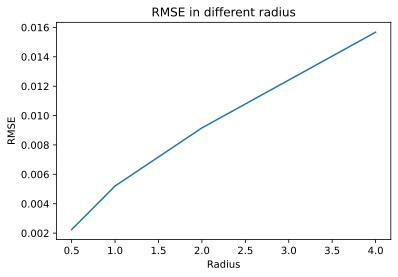

In [7]:
plt.figure()
plt.title("RMSE in different radius")
plt.plot(radii, RMS)
plt.xlabel("Radius")
plt.ylabel("RMSE")
plt.show();

**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

As the radius increases, the RMSE also increases. This is because the input range is larger when the radius increase and same number of neurons spread over a larger range, resulting in inaccurate representations. 

**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

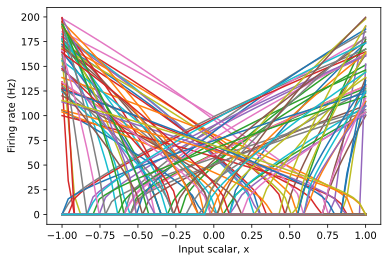

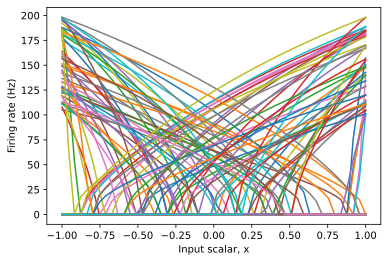

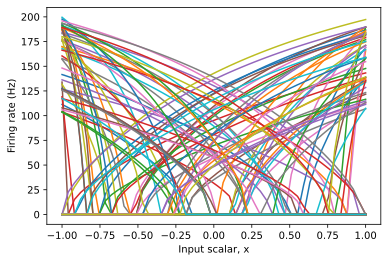

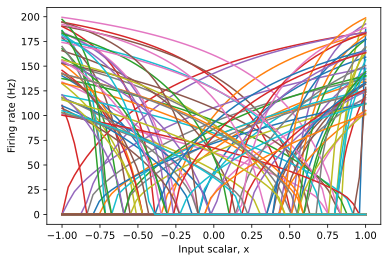

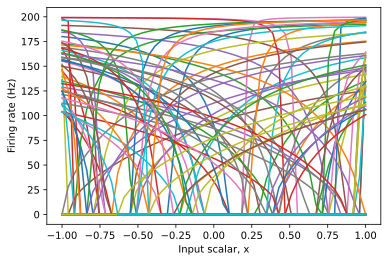

In [8]:
tau_ref_array = [0.001, 0.002, 0.003, 0.004, 0.005]

RMS = [0]*5

for i in range(0,len(tau_ref_array)): 
    lif_model = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref_array[i])

    with model:
        neurons = nengo.Ensemble(100, dimensions=1, 
                                intercepts=nengo.dists.Uniform(-1, 1), 
                                max_rates=nengo.dists.Uniform(100, 200), 
                                neuron_type = lif_model, 
                                seed = i)
        connection = nengo.Connection(neurons, neurons)
    
    sim = nengo.Simulator(model)
    with sim: 
        x_eval, A = tuning_curves(neurons, sim)
    plt.figure()
    plt.plot(x_eval, A)
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x"); 
    
    eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(connection, sim, eval_points=None)

    RMS[i] = computeRMSE(x, x_hat) 

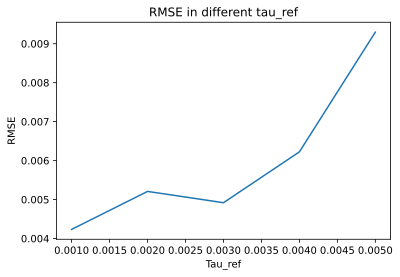

In [9]:
plt.figure()
plt.title("RMSE in different tau_ref")
plt.plot(tau_ref_array, RMS)
plt.xlabel("Tau_ref")
plt.ylabel("RMSE")
plt.show();

**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

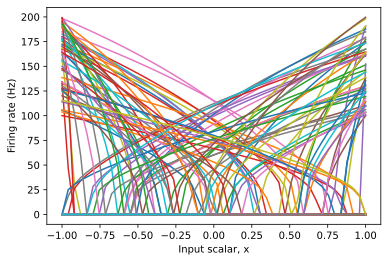

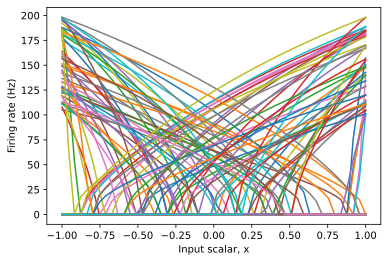

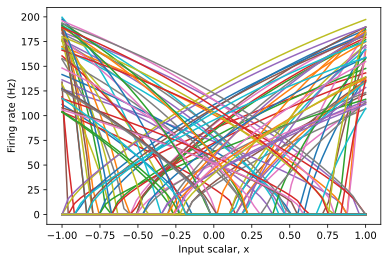

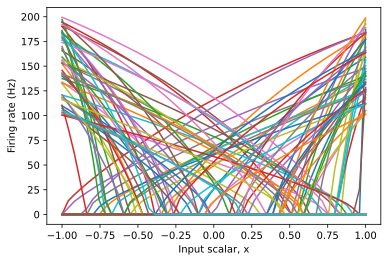

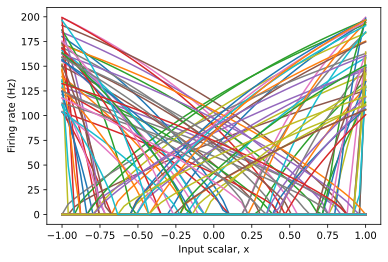

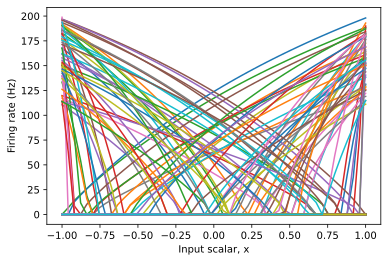

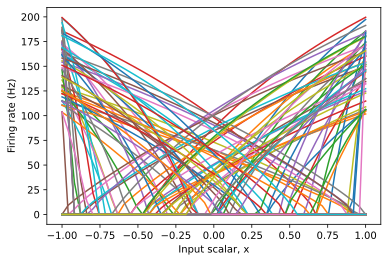

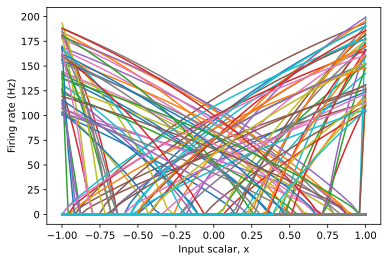

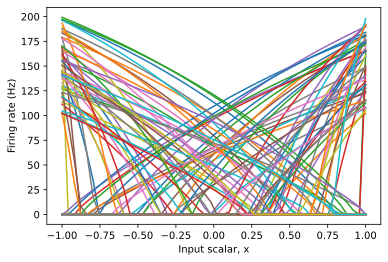

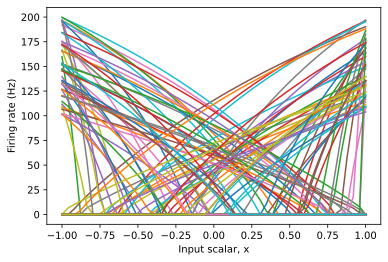

In [10]:
tau_rc_array = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

RMS = [0]*10

for i in range(0,len(tau_rc_array)): 
    lif_model = nengo.LIFRate(tau_rc=tau_rc_array[i], tau_ref=tau_ref)

    with model:
        neurons = nengo.Ensemble(100, dimensions=1, 
                                intercepts=nengo.dists.Uniform(-1, 1), 
                                max_rates=nengo.dists.Uniform(100, 200), 
                                neuron_type = lif_model, 
                                seed = i)
        connection = nengo.Connection(neurons, neurons)
    
    sim = nengo.Simulator(model)
    with sim: 
        x_eval, A = tuning_curves(neurons, sim)
    plt.figure()
    plt.plot(x_eval, A)
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x"); 
    
    eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(connection, sim, eval_points=None)

    RMS[i] = computeRMSE(x, x_hat) 

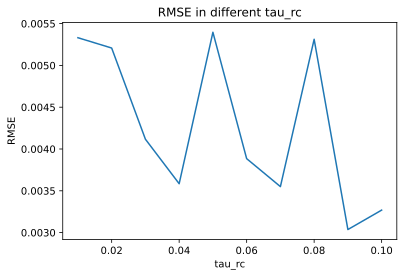

In [11]:
plt.figure()
plt.title("RMSE in different tau_rc")
plt.plot(tau_rc_array, RMS)
plt.xlabel("tau_rc")
plt.ylabel("RMSE")
plt.show();

**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

When $\tau_\mathrm{ref}$ increases, the refactory period between each firing instance for the neuron is larger. \The tuning curves slopes are larger, meaning that the change from large firing rate values to 0 is more abrupt. The RMSE then increases as $\tau_\mathrm{ref}$ increases. The shape change is also the most significant when $\tau_\mathrm{ref}$ increases from 0.004 to 0.005, which is reflected on RMSE change (RMSE increases signficantly from 0.004 to 0.005). 

When $\tau_\mathrm{rc}$ increases, the tuning curves slopes are smaller. The RMSE then oscillates as $\tau_\mathrm{rc}$ increases (peaks of RMSE occur at $\tau_\mathrm{rc}$ = 0.01, 0.05 and 0.08). The range of values that RMS oscillates between is also smaller than the range of RMS values calculated from varying $\tau_\mathrm{ref}$. 

# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

In [12]:
lif_model = nengo.LIF(tau_rc=0.02, tau_ref=0.002) 

tau_syn = 0.01

model = nengo.Network()
with model:
    nd_input = nengo.Node(lambda t: 0 if t<0.1 else (1 if t<0.4 else 0))
    
    neurons_1 = nengo.Ensemble(100, dimensions=1, 
                        intercepts=nengo.dists.Uniform(-1, 1), 
                        max_rates=nengo.dists.Uniform(100, 200), 
                        neuron_type = lif_model)
    
    neurons_2 = nengo.Ensemble(50, dimensions=1, 
                        intercepts=nengo.dists.Uniform(-1, 1), 
                        max_rates=nengo.dists.Uniform(100, 200), 
                        neuron_type = lif_model)
    
    nengo.Connection(nd_input, neurons_1)
    nengo.Connection(neurons_1, neurons_2, synapse=tau_syn)
    
    x_input = nengo.Probe(nd_input)
    p_A = nengo.Probe(neurons_1, synapse=tau_syn)
    p_B = nengo.Probe(neurons_2, synapse=tau_syn)

with nengo.Simulator(model) as sim:
    sim.run(0.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

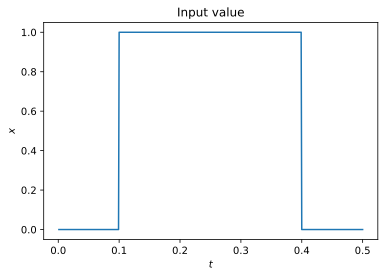

In [13]:
t = sim.trange()

plt.figure()
plt.title("Input value")
plt.plot(t, sim.data[x_input])
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.show();

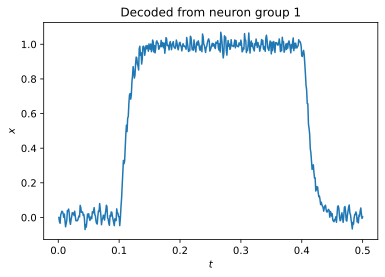

In [14]:
plt.figure()
plt.title("Decoded from neuron group 1")
plt.plot(t, sim.data[p_A])
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.show();

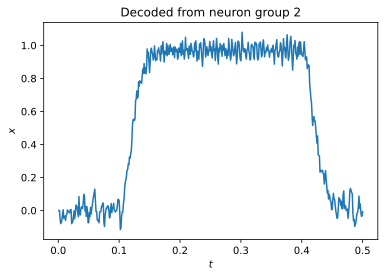

In [15]:
plt.figure()
plt.title("Decoded from neuron group 2")
plt.plot(t, sim.data[p_B])
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.show();

**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

In [16]:
def y(x):
    return 1-2*x

with model:
    nd_input = nengo.Node(lambda t: 0 if t<0.1 else (1 if t<0.4 else 0))
    
    neurons_1 = nengo.Ensemble(100, dimensions=1, 
                        intercepts=nengo.dists.Uniform(-1, 1), 
                        max_rates=nengo.dists.Uniform(100, 200), 
                        neuron_type = lif_model)
    
    neurons_2 = nengo.Ensemble(50, dimensions=1, 
                        intercepts=nengo.dists.Uniform(-1, 1), 
                        max_rates=nengo.dists.Uniform(100, 200), 
                        neuron_type = lif_model)
    
    nengo.Connection(nd_input, neurons_1)
    nengo.Connection(neurons_1, neurons_2, synapse=tau_syn, function=y)
    
    x_input = nengo.Probe(nd_input)
    p_A = nengo.Probe(neurons_1, synapse=tau_syn)
    p_B = nengo.Probe(neurons_2, synapse=tau_syn)

with nengo.Simulator(model) as sim:
    sim.run(0.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

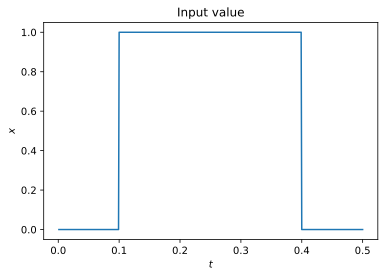

In [17]:
t = sim.trange()

plt.figure()
plt.title("Input value")
plt.plot(t, sim.data[x_input])
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.show();

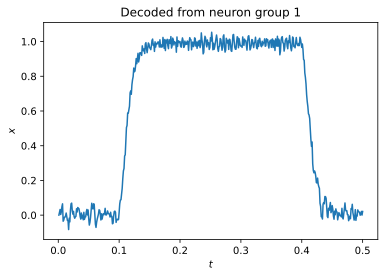

In [18]:
plt.figure()
plt.title("Decoded from neuron group 1")
plt.plot(t, sim.data[p_A])
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.show();

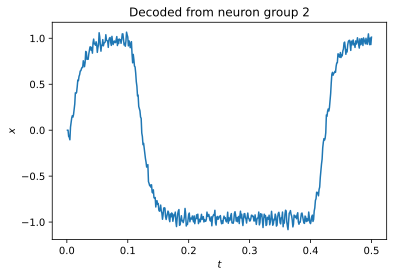

In [19]:
plt.figure()
plt.title("Decoded from neuron group 2")
plt.plot(t, sim.data[p_B])
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.show();

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?

$$\mathbf{A} = 0 $$
$$\mathbf{B} = \mathbf{I}$$

Since $\mathbf{A}'$ = $\tau \mathbf{A}$ +  $\mathbf{I}$ and $\mathbf{B}'$ = $\tau \mathbf{B}$, the expressions are: 

$$\mathbf{A}' = \mathbf{I}$$
$$\mathbf{B}' = \tau \mathbf{I}$$

**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

In [20]:
def simulate_dynamics(stim, g, f, lif_model, tau_syn, tau_recurrent, tau_probe): 
    model_integrator = nengo.Network()
    with model_integrator:
        nd_input = nengo.Node(stim)

        if lif_model != None: 
                    neurons = nengo.Ensemble(200, dimensions=1, 
                            intercepts=nengo.dists.Uniform(-1, 1), 
                            max_rates=nengo.dists.Uniform(100, 200),
                            neuron_type=lif_model)
        else: 
            neurons = nengo.Ensemble(200, dimensions=1, 
                            intercepts=nengo.dists.Uniform(-1, 1), 
                            max_rates=nengo.dists.Uniform(100, 200))

        nengo.Connection(nd_input, neurons, synapse=tau_syn, function=g)
        nengo.Connection(neurons, neurons, synapse=tau_recurrent, function=f)

        p_input = nengo.Probe(nd_input)
        p_x = nengo.Probe(neurons, synapse=tau_probe)

    with nengo.Simulator(model_integrator) as sim:
        sim.run(1.5)
    
    return \
        sim.trange(),  \
        sim.data[p_input], \
        sim.data[p_x]

In [21]:
tau_probe = 0.01
tau_recurrent = 0.05 
tau_syn = 0.005

A = np.array([[0.0]], dtype=float)
B = np.array([[1.0]], dtype=float)

Ap = tau_recurrent * A + np.eye(A.shape[0])
Bp = tau_recurrent * B

stim = lambda t: 0 if t<0.04 else (0.9 if t<1 else 0)

t, p_input, p_x = simulate_dynamics(stim, lambda u:Bp@u, lambda x:Ap@x, None, tau_syn, tau_recurrent, tau_probe)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [22]:
def x_ideal(t): 
    if t < 0.04:
        return 0
    elif t >= 0.04 and t < 1:
        return 0.9*t-0.04
    elif t >= 1:
        return 0.86
    
x_expected = [x_ideal(x) for x in t]

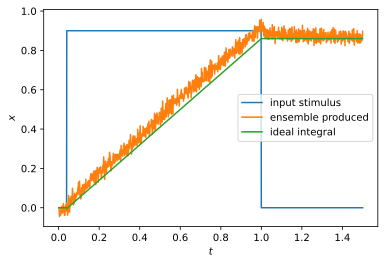

In [23]:
plt.figure()
plt.plot(t, p_input, label="input stimulus")
plt.plot(t, p_x, label='ensemble produced')
plt.plot(t, x_expected, label='ideal integral')
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend(loc="best")
plt.show();

**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

The expected ideal result is: 

\begin{align*}
    x(t) = 
    \int_{0}^{t} u(t') \,\mathrm{d}{t'} = 
    \begin{cases}
        0 & \text{if } t < 0.04 \,,\\
        0.9t - 0.04 & \text{if } 0.04 \leq t < 1 \,,\\
        0.86 & \text{if } 1 \leq t \,.\\
    \end{cases}
\end{align*}

The simulated output roughly aligns with the ideal output values, as it is kept at 0 during the first 0.04s, then rises in a linear function before reaching steady state at roughly 0.86. The ensemble produced integral has small deviations at time instances when function changes, namely at 0.04 and 1s. 

**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

In [24]:
tau_rc = 0.02
tau_ref = 0.002
lif_model = nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref)

t, p_input, p_x = simulate_dynamics(stim, lambda u:Bp@u, lambda x:Ap@x, lif_model, tau_syn, tau_recurrent, tau_probe)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

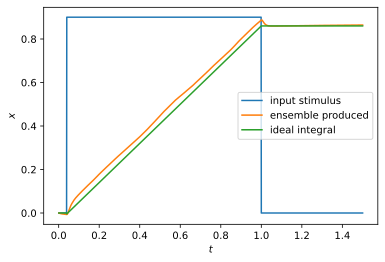

In [25]:
plt.figure()
plt.plot(t, p_input, label="input stimulus")
plt.plot(t, p_x, label='ensemble produced')
plt.plot(t, x_expected, label='ideal integral')
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend(loc="best")
plt.show();

**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

The ensemble result is much cleaner and less noise is present. The small deviations/bumps at time instances when function changes, namely at 0.04 and 1s, are also present. The deviation errors are caused by 2 kinds of errors: static distortion and noise. 

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

In [26]:
stim = lambda t: 0 if t<0.04 else (0.9 if t<0.16 else 0)

t, p_input, p_x = simulate_dynamics(stim, lambda u:Bp@u, lambda x:Ap@x, None, tau_syn, tau_recurrent, tau_probe)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [27]:
def x_ideal(t): 
    if t < 0.04:
        return 0
    elif t >= 0.04 and t < 0.16:
        return 0.9*t-0.04
    elif t >= 0.16:
        return 0.104
    
x_expected = [x_ideal(x) for x in t]

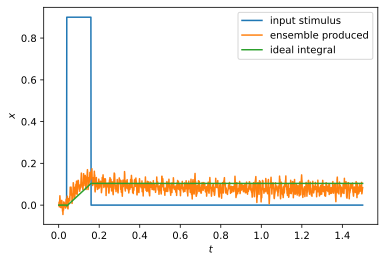

In [28]:
plt.figure()
plt.plot(t, p_input, label="input stimulus")
plt.plot(t, p_x, label='ensemble produced')
plt.plot(t, x_expected, label='ideal integral')
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend(loc="best")
plt.show();

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

The expected ideal result is: 

\begin{align*}
    x(t) = 
    \int_{0}^{t} u(t') \,\mathrm{d}{t'} = 
    \begin{cases}
        0 & \text{if } t < 0.04 \,,\\
        0.9t - 0.04 & \text{if } 0.04 \leq t < 0.16 \,,\\
        0.104 & \text{if } 0.16 \leq t \,.\\
    \end{cases}
\end{align*}

The simulated output roughly aligns with the ideal output values, as it is kept at 0 during the first 0.04s, then rises in a linear function before reaching steady state at roughly 0.104. It is working as expected. 

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

In [29]:
stim = lambda t: 0 if t<0 else (2*t if t<0.45 else 0)

t, p_input, p_x = simulate_dynamics(stim, lambda u:Bp@u, lambda x:Ap@x, None, tau_syn, tau_recurrent, tau_probe)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [30]:
def x_ideal(t): 
    if t >= 0 and t <= 0.45:
        return t**2
    elif t > 0.45: 
        return 0.45**2
    
x_expected = [x_ideal(x) for x in t]

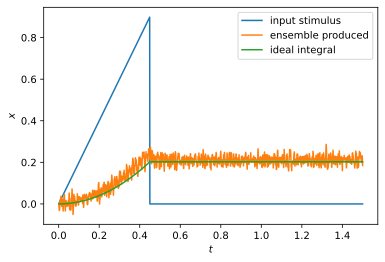

In [31]:
plt.figure()
plt.plot(t, p_input, label="input stimulus")
plt.plot(t, p_x, label='ensemble produced')
plt.plot(t, x_expected, label='ideal integral')
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend(loc="best")
plt.show();

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

The ensemble ends up representing the growth of area under the ramp input as time goes. Therefore, when input is growing from 0 to 0.9, the area under the curve is growing exponentially before reaching a steady state at 0.2025. 

The expected ideal result is: 

\begin{align*}
    x(t) = 
    \int_{0}^{t} u(t') \,\mathrm{d}{t'} = 
    \begin{cases}
        {t^2} & \text{if } 0 < t \leq 0.45 \,,\\
        0.45^2 = 0.2025 & \text{if } 0.45 < t \
    \end{cases}
\end{align*}

**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

In [32]:
stim = lambda t: 5*np.sin(5*t)

t, p_input, p_x = simulate_dynamics(stim, lambda u:Bp@u, lambda x:Ap@x, None, tau_syn, tau_recurrent, tau_probe)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [33]:
def x_ideal(t): 
    return 1-np.cos(5*t)
    
x_expected = [x_ideal(x) for x in t]

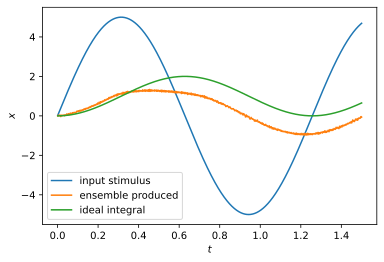

In [34]:
plt.figure()
plt.plot(t, p_input, label="input stimulus")
plt.plot(t, p_x, label='ensemble produced')
plt.plot(t, x_expected, label='ideal integral')
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend(loc="best")
plt.show();

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

The expected ideal result is: 

\begin{align*}
    x(t) = 
    \int_{0}^{t} u(t') \,\mathrm{d}{t'} = 1 - cos(5t)
\end{align*}

The ensemble produced result does not match the ideal integral well in comparison to the equations above. This may be because integrator dynamical system represents linear responses well, but may produce more representational error for nonlinear inputs.  

**l) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

✍ \<YOUR SOLUTION HERE\>

In [35]:
# ✍ <YOUR SOLUTION HERE>